In [39]:
import math
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [4]:
def fitness(X, Y): 
    result = (X-2) * math.sin(X + Y) + (Y - 3) * math.cos(X)
    return result

Z = fitness(1, 1)
print("Z =", Z)

Z = -1.9899020385619612


In [5]:
def decimal_to_gray(decimal_number, array_length=11):
    # Преобразуем десятичное число в бинарный массив заданной длины
    binary_array = [0] * array_length

    for i in range(array_length):
        if decimal_number % 2 == 1:
            binary_array[array_length - 1 - i] = 1
        decimal_number //= 2

    # Преобразуем бинарный массив в код Грея
    gray_array = [binary_array[0]]  # Самый значимый бит остается таким же

    for i in range(1, len(binary_array)):
        gray_bit = binary_array[i] ^ binary_array[i - 1]
        gray_array.append(gray_bit)

    return gray_array


decimal_number = 2046
gray_code = decimal_to_gray(decimal_number)
print("Код Грея для числа", decimal_number, ":", gray_code)

Код Грея для числа 2046 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [6]:
def gray_to_decimal(gray_array):
    binary_array = [gray_array[0]]  # Самый значимый бит остается таким же

    for i in range(1, len(gray_array)):
        binary_bit = gray_array[i] ^ binary_array[i - 1]
        binary_array.append(binary_bit)

    decimal_number = 0
    for i in range(len(binary_array)):
        decimal_number += binary_array[i] * (2 ** (len(binary_array) - 1 - i))

    return decimal_number

gray_code = [1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0]
decimal_number = gray_to_decimal(gray_code)
print("Число из кода Грея:", decimal_number)

Число из кода Грея: 1468


In [7]:
def create_start_population(population_size):
    population = []
    for _ in range(population_size):
        chromosome = [random.randint(0,1) for _ in range(CHR_LENGTH)]
        population.append(chromosome)
    return population

In [13]:
GEN_STABILITY = 100   # число итераций без улучшения результата
EPS_RESULT = 0.001    # точность   
CHR_LENGTH = 22       # длина хромосомы
HALF_LENGTH = 11      # длина для одного значения
POPULATION_SIZE = 100 # размер популяции
CH_MAX = 25           # количество пар потомков
MIN_X = -12
MAX_X = 2
MIN_Y = -14
MAX_Y = 2
delta_X = (MAX_X - MIN_X) / (2**HALF_LENGTH)
delta_Y = (MAX_Y - MIN_Y) / (2**HALF_LENGTH)
print("delta_X = ", delta_X)
print("delta_Y = ", delta_Y)

popul_test = create_start_population(30)
for i, chromosome in enumerate(popul_test):
    print(f"Хромосома {i + 1}: {chromosome}")

delta_X =  0.0068359375
delta_Y =  0.0078125
Хромосома 1: [0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]
Хромосома 2: [1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1]
Хромосома 3: [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0]
Хромосома 4: [1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1]
Хромосома 5: [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]
Хромосома 6: [0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]
Хромосома 7: [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
Хромосома 8: [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0]
Хромосома 9: [1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1]
Хромосома 10: [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1]
Хромосома 11: [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
Хромосома 12: [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0

In [14]:
def get_fitness_value(chromosome):
    first_half = chromosome[:HALF_LENGTH]
    second_half = chromosome[HALF_LENGTH:]
    #print("first_half = ", first_half)
    #print("second_half = ", second_half)
    X_from_gray = gray_to_decimal(first_half)
    #print("X from gray = ", X_from_gray)
    Y_from_gray = gray_to_decimal(second_half)
    #print("Y from gray = ", Y_from_gray)
    X_value = MIN_X + (delta_X * X_from_gray)
    Y_value = MIN_Y + (delta_Y * Y_from_gray)
    #print("X_value = ", X_value)
    #print("Y_value = ", Y_value)
    fitness_value = fitness(X_value, Y_value)
    #print("fitness_value = ", fitness_value)
    return fitness_value

In [15]:
chrom = [0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1]
fit_v = get_fitness_value(chrom)
print("fitness_value = ", fit_v)

fitness_value =  -4.336197532267054


In [16]:
def get_all_fitness_values(population):
    fitness_values = []
    for chromosome in population:
        value = get_fitness_value(chromosome)
        fitness_values.append(value)
    
    return fitness_values

def find_max_value_and_index(arr):
    if not arr:
        return None, None  # Возвращаем None, если массив пуст

    max_value = arr[0]
    max_index = 0

    for i in range(1, len(arr)):
        if arr[i] > max_value:
            max_value = arr[i]
            max_index = i

    return max_value, max_index

In [17]:
fitness_values = get_all_fitness_values(popul_test)
for i, value in enumerate(fitness_values):
    print(f"fitness_value[{i}] = {value}")
    
max_val, max_i = find_max_value_and_index(fitness_values)
print(f"Максимальное значение: {max_val}")
print(f"Индекс максимального значения: {max_i}")

fitness_value[0] = -19.653552691891363
fitness_value[1] = 3.7146654746984167
fitness_value[2] = -3.279614070724514
fitness_value[3] = -3.5191529111587707
fitness_value[4] = 9.115345763355654
fitness_value[5] = -9.062665003457909
fitness_value[6] = -0.3898738637521302
fitness_value[7] = -7.994534744392864
fitness_value[8] = -2.5203655981994926
fitness_value[9] = 3.2181076364219185
fitness_value[10] = -2.4569593883118053
fitness_value[11] = -2.8056849456770063
fitness_value[12] = 19.46983935820716
fitness_value[13] = -8.541740433237624
fitness_value[14] = -4.0161017202461755
fitness_value[15] = 3.5773375803605165
fitness_value[16] = -1.8130494696360078
fitness_value[17] = 4.121724219987269
fitness_value[18] = 6.749237305870672
fitness_value[19] = -12.06297187672439
fitness_value[20] = 2.2599324376384295
fitness_value[21] = 3.6178251004139104
fitness_value[22] = -11.282781027716322
fitness_value[23] = -6.897258230184171
fitness_value[24] = -1.9096557064300166
fitness_value[25] = -8.041212

In [18]:
def two_point_crossing(chromosome1, chromosome2, start, end):
    # Проверка, чтобы начальная точка была меньше конечной точки
    if start > end:
        start, end = end, start

    # Выделение сегментов между точками
    segment1 = chromosome1[start:end+1]
    segment2 = chromosome2[start:end+1]

    # Обмен сегментами между хромосомами
    new_chromosome1 = (
        chromosome1[:start] + segment2 + chromosome1[end+1:]
    )
    new_chromosome2 = (
        chromosome2[:start] + segment1 + chromosome2[end+1:]
    )

    return new_chromosome1, new_chromosome2

chromosome1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
chromosome2 = [22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
start_point = 5
end_point = 10

new_chromosome1, new_chromosome2 = two_point_crossing(chromosome1, chromosome2, start_point, end_point)
print("Новая хромосома 1:", new_chromosome1)
print("Новая хромосома 2:", new_chromosome2)

Новая хромосома 1: [1, 2, 3, 4, 5, 17, 16, 15, 14, 13, 12, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
Новая хромосома 2: [22, 21, 20, 19, 18, 6, 7, 8, 9, 10, 11, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [19]:
def check_last_n_values(arr, n, eps):
    if len(arr) < n:
        return False
    last_n_values = arr[-n:]
    # Проверяем, что разница между последними n элементами меньше eps
    for i in range(1, n):
        if abs(last_n_values[i] - last_n_values[i-1]) > eps:
            return False
    return True

my_array = [1.0, 2.0, 2.1, 2.2, 2.3, 2.3, 2.3]
n = 4
eps = 0.11

result = check_last_n_values(my_array, n, eps)
print(result)

True


In [20]:
def mutation_exchange(chromosome):
    if len(chromosome) < 2:
        return chromosome
    
    index1, index2 = random.sample(range(len(chromosome)), 2)
    chromosome[index1], chromosome[index2] = chromosome[index2], chromosome[index1]

    return chromosome

# Пример использования:
chromosome = [1, 2, 3, 4, 5]
mutated_chromosome = mutation_exchange(chromosome)
print("Мутированная хромосома:", mutated_chromosome)

Мутированная хромосома: [1, 4, 3, 2, 5]


In [21]:
def population_mutation(population):    
    for i, chromosome in enumerate(population):
                chance = random.randint(0,9)
                if not chance:
                    chromosome = mutation_exchange(chromosome)
                    print(f"Мутация хромосомы {i}: {chromosome}")
    return population

In [22]:
popul_test = create_start_population(10)
for i, chromosome in enumerate(popul_test):
    print(f"Хромосома {i}: {chromosome}")
popul_test = population_mutation(popul_test)   

for i, chromosome in enumerate(popul_test):
    print(f"Хромосома {i}: {chromosome}")

Хромосома 0: [0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
Хромосома 1: [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]
Хромосома 2: [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]
Хромосома 3: [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0]
Хромосома 4: [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0]
Хромосома 5: [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0]
Хромосома 6: [0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
Хромосома 7: [1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0]
Хромосома 8: [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]
Хромосома 9: [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]
Мутация хромосомы 1: [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]
Хромосома 0: [0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
Хромосома 1: [0, 0, 1, 0, 0, 1, 

In [23]:
def population_selection(population, fitness_values, after_selection_size):
    before_selection_size = len(population)
    if after_selection_size > before_selection_size:
        return population
    selection = []
    is_selected = [True for _ in range(before_selection_size)]
    selected_count = 0
    while (selected_count < after_selection_size):
        chromosome1_index = random.randint(0,before_selection_size - 1)
        chromosome2_index = random.randint(0,before_selection_size - 1)
        if chromosome1_index == chromosome2_index:
            continue
        if not (is_selected[chromosome1_index] & is_selected[chromosome2_index]):
            continue
        fitness_value1 = fitness_values[chromosome1_index]
        fitness_value2 = fitness_values[chromosome2_index]
        #print(f"Хромосома {chromosome1_index}, фитнес = {fitness_value1}")
        #print(f"Хромосома {chromosome2_index}, фитнес = {fitness_value2}")
        #print("#########################################################")
        if fitness_value1 > fitness_value2:
            selection.append(population[chromosome1_index])
            is_selected[chromosome1_index] = False
        else:
            selection.append(population[chromosome2_index])
            is_selected[chromosome2_index] = False
        selected_count += 1
    
    return selection

In [24]:
popul_test = create_start_population(50)
for i, chromosome in enumerate(popul_test):
    print(f"Хромосома {i}: {chromosome}")
fitness_test = get_all_fitness_values(popul_test)
for i, value in enumerate(fitness_test):
    print(f"fitness_value[{i}] = {value}")

popul_test = population_selection(popul_test, fitness_test, 30)
#for i, chromosome in enumerate(popul_test):
#    print(f"Хромосома {i}: {chromosome}")
fitness_test = get_all_fitness_values(popul_test)
for i, value in enumerate(fitness_test):
    print(f"fitness_value[{i}] = {value}")

Хромосома 0: [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]
Хромосома 1: [0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]
Хромосома 2: [1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0]
Хромосома 3: [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]
Хромосома 4: [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1]
Хромосома 5: [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]
Хромосома 6: [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]
Хромосома 7: [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
Хромосома 8: [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0]
Хромосома 9: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1]
Хромосома 10: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
Хромосома 11: [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]
Хромосома 12: [0, 0, 0, 1, 0, 1, 0, 0,

In [25]:
GEN_STABILITY = 100   # число итераций без улучшения результата
EPS_RESULT = 0.001    # точность   
CHR_LENGTH = 22       # длина хромосомы
HALF_LENGTH = 11      # длина для одного значения
POPULATION_SIZE = 100 # размер популяции
CH_MAX = 25           # количество пар потомков
MIN_X = -12
MAX_X = 2
MIN_Y = -14
MAX_Y = 2
delta_X = (MAX_X - MIN_X) / (2**HALF_LENGTH)
delta_Y = (MAX_Y - MIN_Y) / (2**HALF_LENGTH)
print("delta_X = ", delta_X)
print("delta_Y = ", delta_Y)

delta_X =  0.0068359375
delta_Y =  0.0078125


In [26]:
def gen_algorithm():
    max_fit_gens = []      # наилучший рузультат каждое поколение
    chrs_with_max_fit = [] # хромосомы наилучших результатов каждого поколения
    population = []        # популяций хромосом
    fitness_values = []    # значения фитнес функций актуальных хромосом
    gens = 0               # счетчик поколений   

    population = create_start_population(POPULATION_SIZE)
    #for i, chromosome in enumerate(population):
    #    print(f"Хромосома {i}: {chromosome}")        
    fitness_values = get_all_fitness_values(population)
    #for i, value in enumerate(fitness_values):
    #    print(f"fitness_value[{i}] = {value}")    
    max_val, max_i = find_max_value_and_index(fitness_values)
    max_fit_gens.append(max_val)
    chrs_with_max_fit.append(population[max_i])
    print(f"Максимальное значение: {max_val}")
    print(f"Хромосома максимального значения: {population[max_i]}")
    gens = 1
    
    while not check_last_n_values(max_fit_gens, GEN_STABILITY, EPS_RESULT):

        # Скрещивание
        ###############################################################       
        is_parent = [True for _ in range(POPULATION_SIZE)]
        ch_pairs = 0
        while (ch_pairs < CH_MAX):
            ch_num1 = random.randint(0, POPULATION_SIZE - 1)
            ch_num2 = random.randint(0, POPULATION_SIZE - 1)            
            if (ch_num1 == ch_num2):
                continue
            if not(is_parent[ch_num1] & is_parent[ch_num2]):
                continue
            ch1 = population[ch_num1]
            ch2 = population[ch_num2]
            start_exchange = random.randint(3, HALF_LENGTH - 3)
            end_exchange = random.randint(HALF_LENGTH + 2, CHR_LENGTH - 3)
            ch1, ch2 = two_point_crossing(ch1, ch2, start_exchange, end_exchange)
            population.append(ch1)
            population.append(ch2)
            ch1_fitness = get_fitness_value(ch1)
            ch2_fitness = get_fitness_value(ch2)
            fitness_values.append(ch1_fitness)
            fitness_values.append(ch2_fitness)
            is_parent[ch_num1] = False
            is_parent[ch_num2] = False
            ch_pairs += 1
        ###############################################################
        
        # Мутация
        ###############################################################
        population = population_mutation(population) 
        ###############################################################
        
        # Отбор
        ###############################################################
        population = population_selection(population, fitness_values, POPULATION_SIZE)
        fitness_values = get_all_fitness_values(population)        
        max_val, max_i = find_max_value_and_index(fitness_values)
        max_fit_gens.append(max_val)
        chrs_with_max_fit.append(population[max_i])
        
        ###############################################################
        
        
    #for i, chromosome in enumerate(population):
    #    print(f"Хромосома {i + 1}: {chromosome}")    
    for i, value in enumerate(max_fit_gens):
        print(f"Поколение {i}: {value}")  
    return max_fit_gens, chrs_with_max_fit[gens-1]
    
    

In [41]:
max_gens, chromosome = gen_algorithm()
print(f"{chromosome}")
X_from_gray = gray_to_decimal(chromosome[:HALF_LENGTH])
Y_from_gray = gray_to_decimal(chromosome[HALF_LENGTH:])
X_value = MIN_X + (delta_X * X_from_gray)
Y_value = MIN_Y + (delta_Y * Y_from_gray)
print(f"X = {X_value}, Y = {Y_value}")


Максимальное значение: 19.456769010882166
Хромосома максимального значения: [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]
Мутация хромосомы 2: [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]
Мутация хромосомы 3: [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0]
Мутация хромосомы 31: [0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0]
Мутация хромосомы 35: [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0]
Мутация хромосомы 56: [0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]
Мутация хромосомы 70: [0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0]
Мутация хромосомы 102: [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1]
Мутация хромосомы 110: [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0]
Мутация хромосомы 111: [0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
Мутация хромосомы 127: [1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0

Мутация хромосомы 1: [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0]
Мутация хромосомы 5: [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0]
Мутация хромосомы 11: [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0]
Мутация хромосомы 12: [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0]
Мутация хромосомы 19: [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1]
Мутация хромосомы 21: [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1]
Мутация хромосомы 25: [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1]
Мутация хромосомы 26: [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0]
Мутация хромосомы 32: [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0]
Мутация хромосомы 33: [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0]
Мутация хромосомы 37: [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0]
Мутация хромосомы 40: [

139


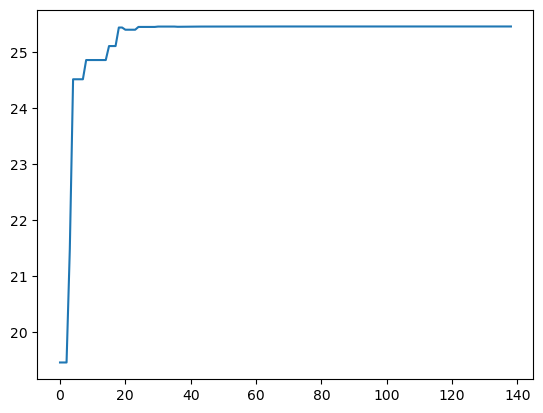

In [42]:
count = len(max_gens)
gens = list(range(count))
print(count)
plt.plot(gens, max_gens)
plt.show()

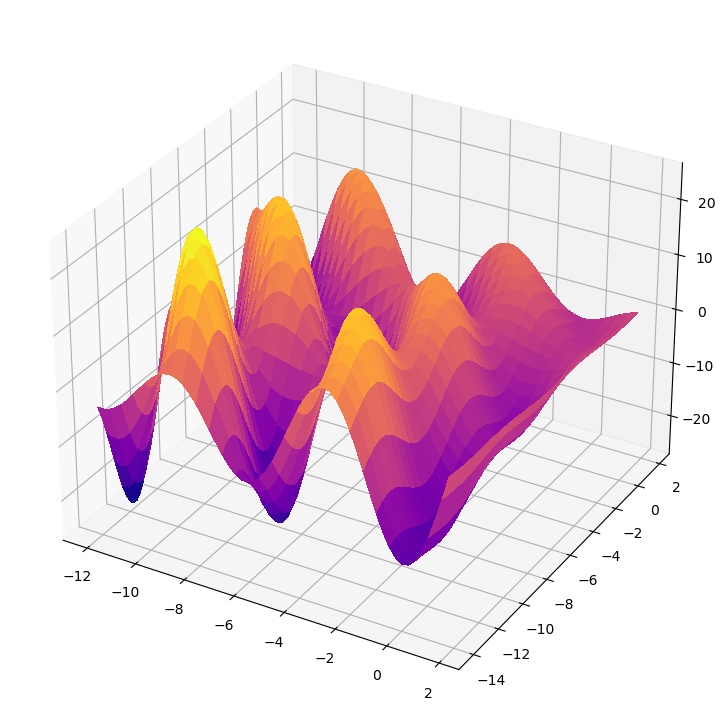

In [40]:
X = np.arange(-12, 2, 0.25)
Y = np.arange(-14, 2, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X-2) * np.sin(X + Y) + (Y - 3) * np.cos(X)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.plasma, linewidth=0, antialiased=False)